# 波士顿房价数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']#正常显示中文标签
plt.rcParams['axes.unicode_minus']=False#正常显示负号
%matplotlib inline

In [2]:
Boston_C=pd.read_csv('./boston_house_price_Chinese.csv',encoding='gbk')#导入数据
Boston_E=pd.read_csv('boston_house_price_english.csv')

In [3]:
Boston_E.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
Boston_C.describe()

,犯罪率,住宅用地所占比例,城镇中非商业用地所占比例,是否处于查尔斯河边,一氧化碳浓度,住宅房间数,1940年以前建成的业主自住单位的占比,距离波士顿5个商业中心的加权平均距离,距离高速公路的便利指数,不动产权税,学生/教师比例,黑人比例,低收入阶层占比,房价中位数
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**注意上图各种数据的最值，方便在画拟合图时确定x的取值范围**

### 处于查尔斯河边的住宅占比

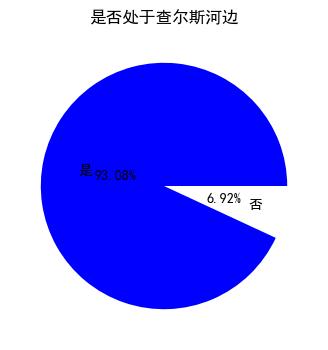

In [5]:
plt.figure(figsize=(4,4))
chas_total=Boston_E['chas'].value_counts()
plt.pie(chas_total,autopct='%.2f%%',labels=['是','否'],colors=['b','w'],pctdistance=0.4,labeldistance=0.6,shadow=False,explode=[0,0.1],textprops=dict(size=10))
plt.title("是否处于查尔斯河边")
plt.show()

### 黑人比例与犯罪率的关系&&低收入阶层占比与房价中位数的关系

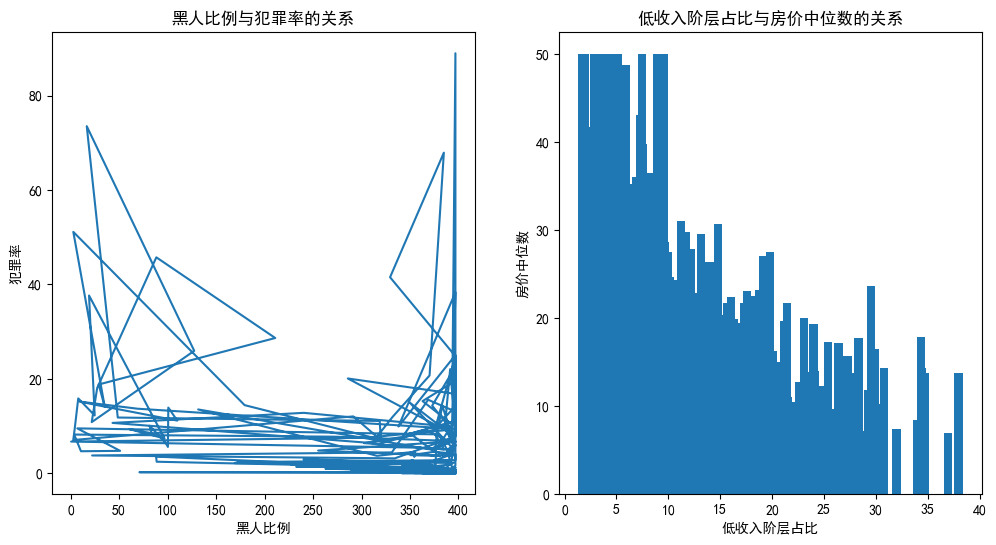

In [6]:
plt.figure(figsize=(2*6,6))

_Chart1=plt.subplot(1,2,1)
x_b_crim=Boston_E['b']
y_b_crim=Boston_E['crim']
_Chart1.plot(x_b_crim,y_b_crim)
_Chart1.set_title("黑人比例与犯罪率的关系")
_Chart1.set_xlabel("黑人比例")
_Chart1.set_ylabel("犯罪率")

_Chart2=plt.subplot(1,2,2)
x_lstat_medv=Boston_E['lstat']
y_lstat_medv=Boston_E['medv']
_Chart2.bar(x_lstat_medv,y_lstat_medv)
_Chart2.set_title("低收入阶层占比与房价中位数的关系")
_Chart2.set_xlabel("低收入阶层占比")
_Chart2.set_ylabel("房价中位数")
plt.show()


## 左图似乎看不出来有什么关系

### 住宅房间数与房价中位数的关系

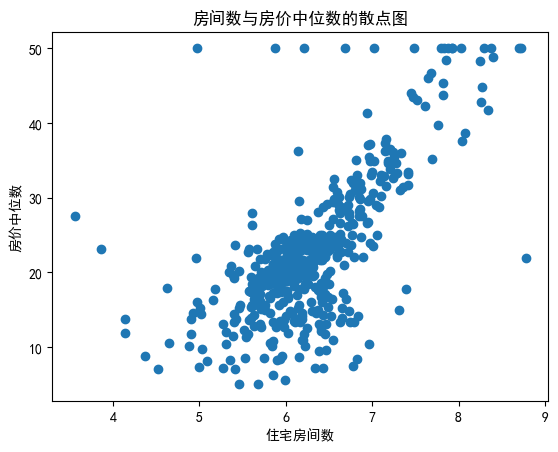

In [7]:
x_medv_rm=Boston_E['rm'];
y_medv_rm=Boston_E['medv']
plt.scatter(x_medv_rm,y_medv_rm)
plt.title("房间数与房价中位数的散点图")
plt.xlabel("住宅房间数")
plt.ylabel("房价中位数")
plt.show()

### 使用最小二乘法拟合  *房间数与房价中位数* 的关系

-34.67062077643811


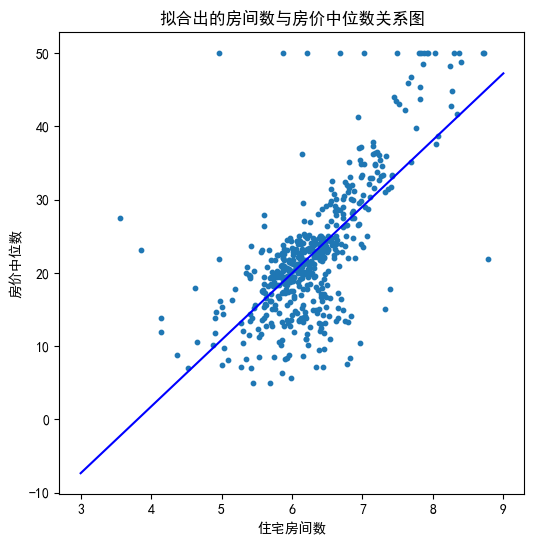

In [8]:
mean_rm=np.mean(Boston_E['rm'])#x的平均数
mean_medv=np.mean(Boston_E['medv'])#y的平均数
totality_boston=np.size(Boston_E['rm'])#数据个数
sum_multi_rmmedv=np.sum(Boston_E['rm']*Boston_E['medv'])#x和y乘积之和
sum_rm_squre=np.sum(Boston_E['rm']**2)#x平方求和
#套进求k和求b的公式
k_here=(sum_multi_rmmedv-totality_boston*mean_medv*mean_rm)/(sum_rm_squre-totality_boston*(mean_rm**2))
b_here=mean_medv-k_here*mean_rm
print(b_here)
plt.figure(figsize=(6,6))

x_medv_rm=Boston_E['rm']
y_medv_rm=Boston_E['medv']
plt.scatter(x_medv_rm,y_medv_rm,s=10)#将散点图画在一起，方便对比

x_final=np.arange(3,10)#因为房间数最少值是3点几，所以从x的值从3开始取
y_final=k_here*x_final+b_here
plt.plot(x_final,y_final,'blue')


plt.title("拟合出的房间数与房价中位数关系图")
plt.xlabel("住宅房间数")
plt.ylabel("房价中位数")
plt.show()

### 用梯度降低法预测

In [14]:
#用梯度降低法预测
eta=0.01#学习率

k=0
b=0

last_k=k+0.1
last_b=b+0.1#设置k和b的上一次迭代的值，用来与下一次迭代的对比，比较变化量与精度的大小
precision=0.0001#精度

x=Boston_E['rm']
y=Boston_E['medv']

#times=10000
#for i in range(times):  #可以直接设置迭代次数，不过不够“智能”

while True:
    if (np.abs(k-last_k)<precision) and (np.abs(b-last_b)<precision) :#比较变化量与精度的大小，小于精度则退出循环
        break

    last_k=k
    last_b=b
    
    y_pred=k*x+b
    dm=-2*np.sum((y-y_pred)*x)/len(x)
    db = -2 * np.sum(y - y_pred) / len(x)#损失函数的梯度
    k -= eta * dm
    b-=eta*db

print('最终k为：',k)
print('最终b为：',b)

最终k为： 9.036754811321066
最终b为： -34.25489518953926


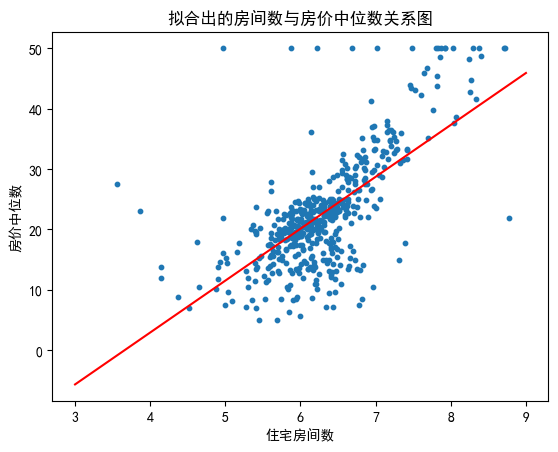

In [10]:
x_modle=np.arange(3,10)
y_modle=k*x_modle+b
plt.plot(x_modle,y_modle,'red')

x_medv_rm=Boston_E['rm']
y_medv_rm=Boston_E['medv']
plt.scatter(x_medv_rm,y_medv_rm,s=10)#将散点图画在一起，方便对比

plt.title("拟合出的房间数与房价中位数关系图")
plt.xlabel("住宅房间数")
plt.ylabel("房价中位数")
plt.show()

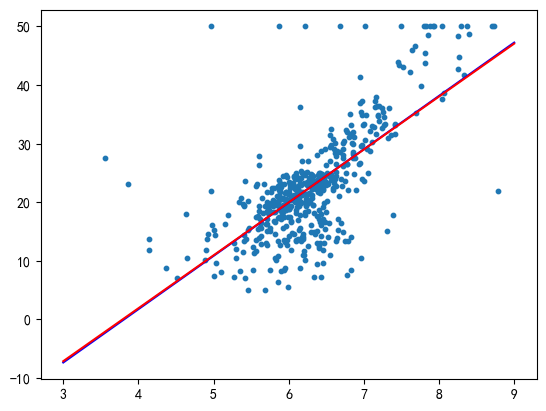

In [15]:
plt.figure()

x_medv_rm=Boston_E['rm']
y_medv_rm=Boston_E['medv']
plt.scatter(x_medv_rm,y_medv_rm,s=10)#将散点图画在一起，方便对比

x_final=np.arange(3,10)#因为房间数最少值是3点几，所以从x的值从3开始取
y_final=k_here*x_final+b_here
plt.plot(x_final,y_final,'blue')#最小二乘法

x_modle=np.arange(3,10)
y_modle=k*x_modle+b
plt.plot(x_modle,y_modle,'red')#梯度下降法

plt.show()

### 将用最小二乘法拟合的线画在同一张图上，观察上图发现两条线几乎重合